# Part II - (Exploration of Flight Dataset)
## by (BAMIGBOLA VICTOR)


## Investigation Overview


> In this investigation I want to look into the factors that contributed greatly on flight delay as well as cancellation. The main focus are on cancellation factors , delays variables of the dataset as well as unique carriers

## Dataset Overview

> The dataset is from Data Expo 2009. It comprises of flight operation details i.e Arrival and Departure of all flight within USA, starting from October 1987 to April 2008. We have the dataset divided into each year which can be downloaded on there website. There website address is as follows https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7.
However, for the sake of this analysis we would limit the dataset to 3 years which are from 2006 to 2008 due to how big the dataset his for the whole years.


In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#Read CSV files for years 2006,2007 and 2008 into individual dataframes
flight_2008=pd.read_csv('2008_files_22.csv')
flight_2007=pd.read_csv('2007_files_21.csv')
flight_2006=pd.read_csv('2006_files_20.csv')


In [3]:
#Append all three dataframes and save into master df
flight_data=flight_2006.append([flight_2007,flight_2008])

In [4]:
#Changing column names to a more meaningful header
flight_data=flight_data.rename(columns={'Year':'year','Month':'month','DayofMonth':'day_of_month','DayOfWeek':'day_of_week','DepTime':'actual_dep_time','CRSArrTime':'scheduled_arrival_time','CRSDepTime':'scheduled_departure_time','TaxiIn':'taxi_in_time','TaxiOut':'taxi_out_time','ArrDelay':'arrival_delay','Dest':'destination_airport_code','DepDelay':'departure_delay','AirTime':'air_time','ActualElapsedTime':'actual_elapsed_time','ArrTime':'arrival_time','UniqueCarrier':'unique_carrier','FlightNum':'flight_number','TailNum':'tail_number','CarrierDelay':'carrier_delay','WeatherDelay':'weather_delay','SecurityDelay':'security_delay','LateAircraftDelay':'late_aircraft_delay','CancellationCode':'cancellation_code','Cancelled':'cancelled','Diverted':'diverted','Distance':'distance','Origin':'origin','CRSElapsedTime':'CRS_elapsed_time','NASDelay':'nas_delay'})

In [5]:
# To create function that will change name of  x,y axis and chart title.

def plot_labels(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### DISTRIBUTION OF CARRIER WITH HIGHEST CANCELLATION

## (Visualization 1)

> From the plot below we can see that MQ(Envoy Air), AA(American Airline) and OO(Sky West Airline )had the highest cancellation from other carrier which the reason for the cancellation of this top airline are due to the four cancellation code A,B,C,D which are Carrier, Weather, National Air System, Security respectively.


In [6]:
#identifying the subset of the original dataframe that has only the cancellation date
flight_data_sub=flight_data.query('cancellation_code in ["A","B","C","D"]')

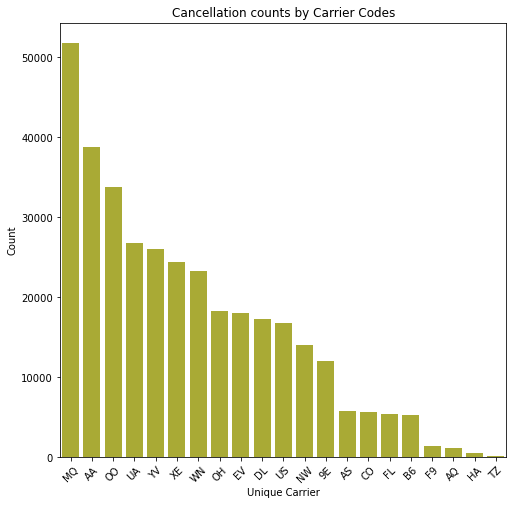

In [7]:
#Identiying the distribution of carriers that had the highest cancellations

#Adding of the various carriers count value
carriers_cancellations=flight_data_sub.unique_carrier.value_counts()

# Plot code
base_color=sb.color_palette()[8]
plt.figure(figsize=(8,8))
flight=sb.countplot(data=flight_data_sub,x='unique_carrier',color=base_color,order=carriers_cancellations.index)
flight.set_xticklabels(labels=carriers_cancellations.index,rotation=45)
plot_labels('Unique Carrier','Count','Cancellation counts by Carrier Codes')

### DISTRIBUTION OF MOST COMMON REASONS FOR FLIGHT CANCELLATION

## (Visualization 2)

> As shown in graph below, it is obvious that A (Carrier) as well as B (Weather) has the height reason why flight are been cancelled

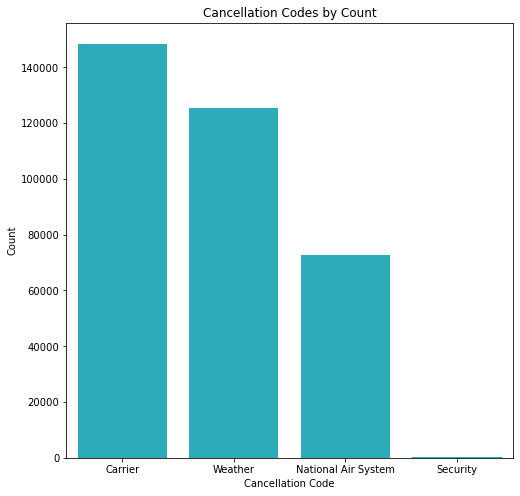

In [8]:
#Plotting the distribution using Seaborn Plot

# Plotting code
base_color=sb.color_palette()[9]
plt.figure(figsize=[8,8])
flight=sb.countplot(data=flight_data,x='cancellation_code',color=base_color,order=['A','B','C','D'])
plot_labels('Cancellation Code','Count','Cancellation Codes by Count')
flight.set_xticklabels(['Carrier','Weather','National Air System','Security']);

### CARRIER PRODUCTIVITY BY ARRIVAL TIME

## (Visualization 3)
> From the plot below we can see that the green color represent the total flight that arrived on time while the red represent the total flight that got delayed. Which implies the larger the red color the lower the productivity of the flight.

In [9]:
# Determining the Delayed flights which were not cancelled by individual carrier
flight_data_departure_delay=flight_data
arrival_delayed=flight_data_departure_delay.query('cancelled==0 & arrival_delay>0').groupby('unique_carrier').size().reset_index(name='delayed_flights')

In [10]:
# Determining the total flight that left the airport ie not cancelled
uncancelled_flights=flight_data.query('cancelled==0').groupby('unique_carrier').size().reset_index(name='total_flights')

In [11]:
#Combining both arrival_delayed dataframe as well as Uncancelled_flights dataframe on unique_carrier column
flight_combine_delay=pd.merge(arrival_delayed,uncancelled_flights,on='unique_carrier')

In [12]:
#Getting the percentage of delayed flights
flight_combine_delay['delayed_percent']=flight_combine_delay['delayed_flights']/flight_combine_delay['total_flights']*100

In [13]:
#Generating a new column on Time Percentage
flight_combine_delay['on_time_percent']=100-flight_combine_delay.delayed_percent
flight_combine_delay=flight_combine_delay.sort_values(by='delayed_percent',ascending=False)

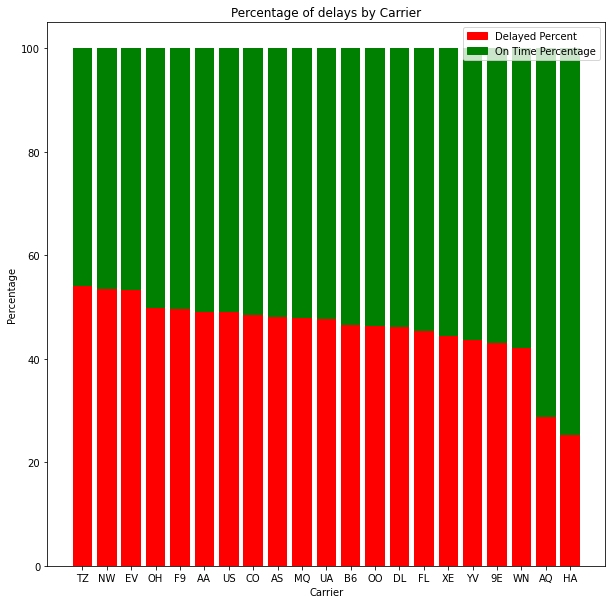

In [16]:
#plotting code
plt.figure(figsize=(10,10))
plt.bar(data=flight_combine_delay,x='unique_carrier',height='on_time_percent',color='green',bottom=flight_combine_delay.delayed_percent)
plt.bar(data=flight_combine_delay,x='unique_carrier',height='delayed_percent',color='red')
red_patch=mpatches.Patch(color='red',label='Delayed Percent')
green_patch=mpatches.Patch(color='green',label='On Time Percentage')
plot_labels('Carrier','Percentage','Percentage of delays by Carrier')
plt.legend(handles=[red_patch,green_patch]);

### TREND OF DELAY FACTOR BY MONTH TO MONTH

## (Visualization 4)
> Looking at the plot below we can see that Late_Aircraft_Delay and Weather has the highest effect on flight delay than any other delay factors

In [17]:
#Generating dataframes that will group delay by month and calculate average delay for each
carrier_by_month=flight_data.query('carrier_delay>0').groupby('month')['carrier_delay'].mean().reset_index(name='carrier_delay')
weather_by_month=flight_data.query('weather_delay>0').groupby('month')['weather_delay'].mean().reset_index(name='weather_delay')
nas_by_month=flight_data.query('nas_delay>0').groupby('month')['nas_delay'].mean().reset_index(name='nas_delay')
security_by_month=flight_data.query('security_delay>0').groupby('month')['security_delay'].mean().reset_index(name='security_delay')
lateaircraft_by_month=flight_data.query('late_aircraft_delay>0').groupby('month')['late_aircraft_delay'].mean().reset_index(name='late_aircraft_delay')

In [18]:

#combining all the dataframes into one
temp=carrier_by_month.merge(weather_by_month,on='month')
temp=temp.merge(nas_by_month,on='month')
temp=temp.merge(security_by_month,on='month')
delays_by_month=temp.merge(lateaircraft_by_month,on='month')

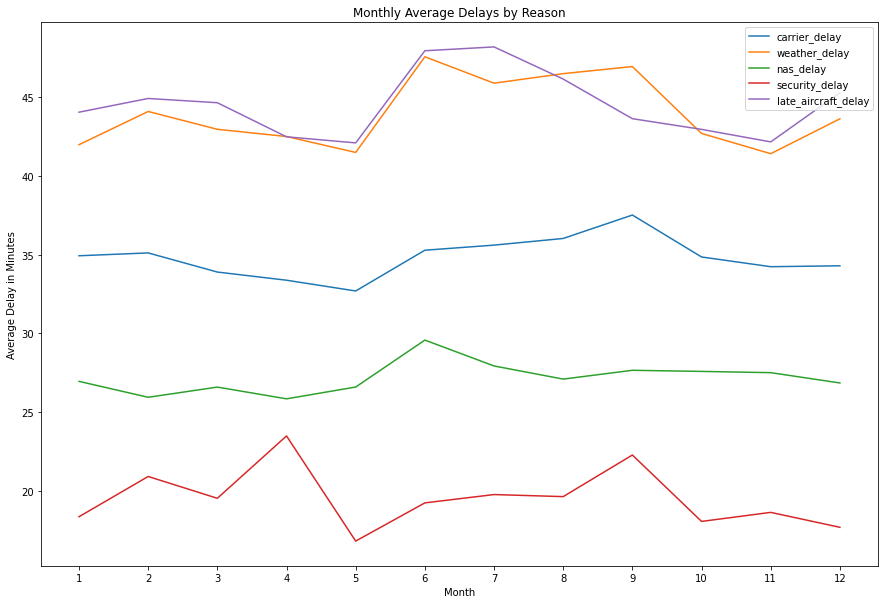

In [19]:
#Trend plotting code

plt.figure(figsize=(15,10))
plt.errorbar(x=delays_by_month.month,y=delays_by_month.carrier_delay,label='carrier_delay')
plt.errorbar(x=delays_by_month.month,y=delays_by_month.weather_delay,label='weather_delay')
plt.errorbar(x=delays_by_month.month,y=delays_by_month.nas_delay,label='nas_delay')
plt.errorbar(x=delays_by_month.month,y=delays_by_month.security_delay,label='security_delay')
plt.errorbar(x=delays_by_month.month,y=delays_by_month.late_aircraft_delay,label='late_aircraft_delay')
plt.legend(loc='upper right')

plot_labels('Month','Average Delay in Minutes','Monthly Average Delays by Reason')
plt.xticks(delays_by_month.month);

### TREND OF DELAY FACTORS BY YEAR TO YEAR

## (Visualization 5)
> Looking at the plot below we can see that both weather and late aircraft delay has the highest delay compared to other factors on all the years.

In [21]:
#Generating dataframes that will group delay by year and calculate average delay for each
carrier_by_year=flight_data.query('carrier_delay>0').groupby('year')['carrier_delay'].mean().reset_index(name='carrier_delay')
weather_by_year=flight_data.query('weather_delay>0').groupby('year')['weather_delay'].mean().reset_index(name='weather_delay')
nas_by_year=flight_data.query('nas_delay>0').groupby('year')['nas_delay'].mean().reset_index(name='nas_delay')
security_by_year=flight_data.query('security_delay>0').groupby('year')['security_delay'].mean().reset_index(name='security_delay')
lateaircraft_by_year=flight_data.query('late_aircraft_delay>0').groupby('year')['late_aircraft_delay'].mean().reset_index(name='late_aircraft_delay')


In [22]:

#combining all the dataframes into one
temp=carrier_by_year.merge(weather_by_year,on='year')
temp=temp.merge(nas_by_year,on='year')
temp=temp.merge(security_by_year,on='year')
delays_by_year=temp.merge(lateaircraft_by_year,on='year')

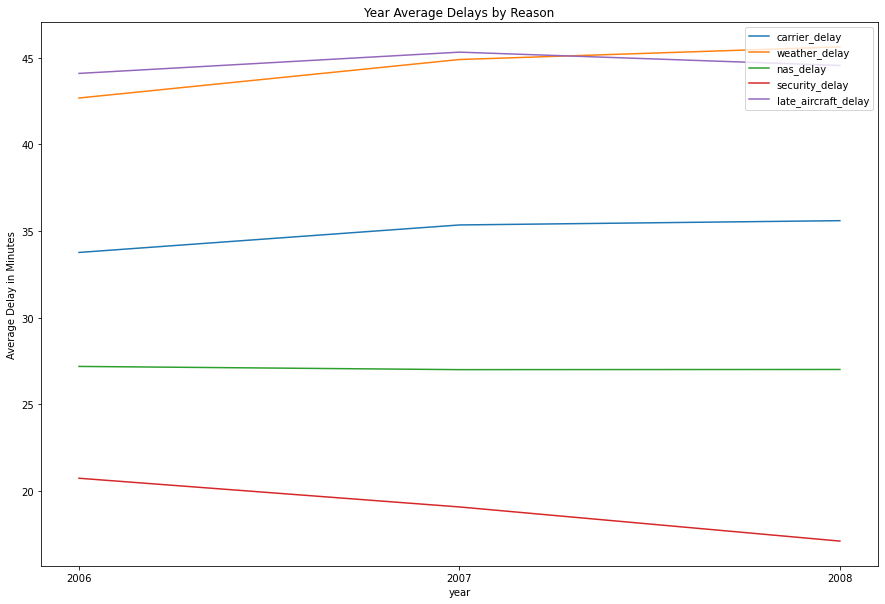

In [23]:
#Trend plotting code

plt.figure(figsize=(15,10))
plt.errorbar(x=delays_by_year.year,y=delays_by_year.carrier_delay,label='carrier_delay')
plt.errorbar(x=delays_by_year.year,y=delays_by_year.weather_delay,label='weather_delay')
plt.errorbar(x=delays_by_year.year,y=delays_by_year.nas_delay,label='nas_delay')
plt.errorbar(x=delays_by_year.year,y=delays_by_year.security_delay,label='security_delay')
plt.errorbar(x=delays_by_year.year,y=delays_by_year.late_aircraft_delay,label='late_aircraft_delay')
plt.legend(loc='upper right')

plot_labels('year','Average Delay in Minutes','Year Average Delays by Reason')
plt.xticks(delays_by_year.year);

In [4]:
!jupyter nbconvert Part_II_slide_flight.ipynb --to slides --post serve --no-input --no-prompt

^C
